### Librairies

In [1]:
import pandas as pd
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA


In [2]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

### Importation

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [4]:
FILE_PATH = r'data\2016_Building_Energy_Benchmarking.csv'

In [5]:
data = pd.read_csv(FILE_PATH)

In [6]:
data.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.0,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Dictionnaire des données : https://data.seattle.gov/Built-Environment/2016-Building-Energy-Benchmarking/2bpz-gwpy/about_data

In [8]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

### Fonctions

In [9]:
def affected_rows(func):
    def wrapper(*args, **kwargs):
        df = args[0]
        initial_row_count = df.shape[0]
        result = func(*args, **kwargs)
        final_row_count = result.shape[0]
        print(f"Rows before operation: {initial_row_count}, Rows after: {final_row_count}, Number of rows affected: {initial_row_count - final_row_count}")
        return result
    return wrapper

In [10]:
@affected_rows
def filter_dataframe(df: pd.DataFrame, column: str, values: list[str]) -> pd.DataFrame:
    return df[~df[column].isin(values)] 

In [11]:
def plot_histbox(df, column, figsize=(12,5), **kwargs):
    fig, ax = plt.subplots(1,2, figsize=figsize)
    fig.suptitle(f"Distribution pour '{column}'")

    sns.boxplot(df[column], ax=ax[0], width=0.4, **kwargs)
    ax[0].set_xlabel("")
    ax[0].set_ylabel("")
    sns.histplot(df[column], ax=ax[1], **kwargs)
    ax[1].set_xlabel("")
    ax[1].set_ylabel("")

    ax[0].set_title("Boxplot")
    ax[1].set_title("Histogram")

    plt.tight_layout()
    plt.show();

In [12]:
def limite_haute(colonne) -> float:

    q1, q3 = np.quantile(colonne, [0.25, 0.75])

    iqr = q3 - q1
  
    limite_haute = q3 + 1.5 * iqr
    
    return limite_haute


### Nettoyage des colonnes inutiles

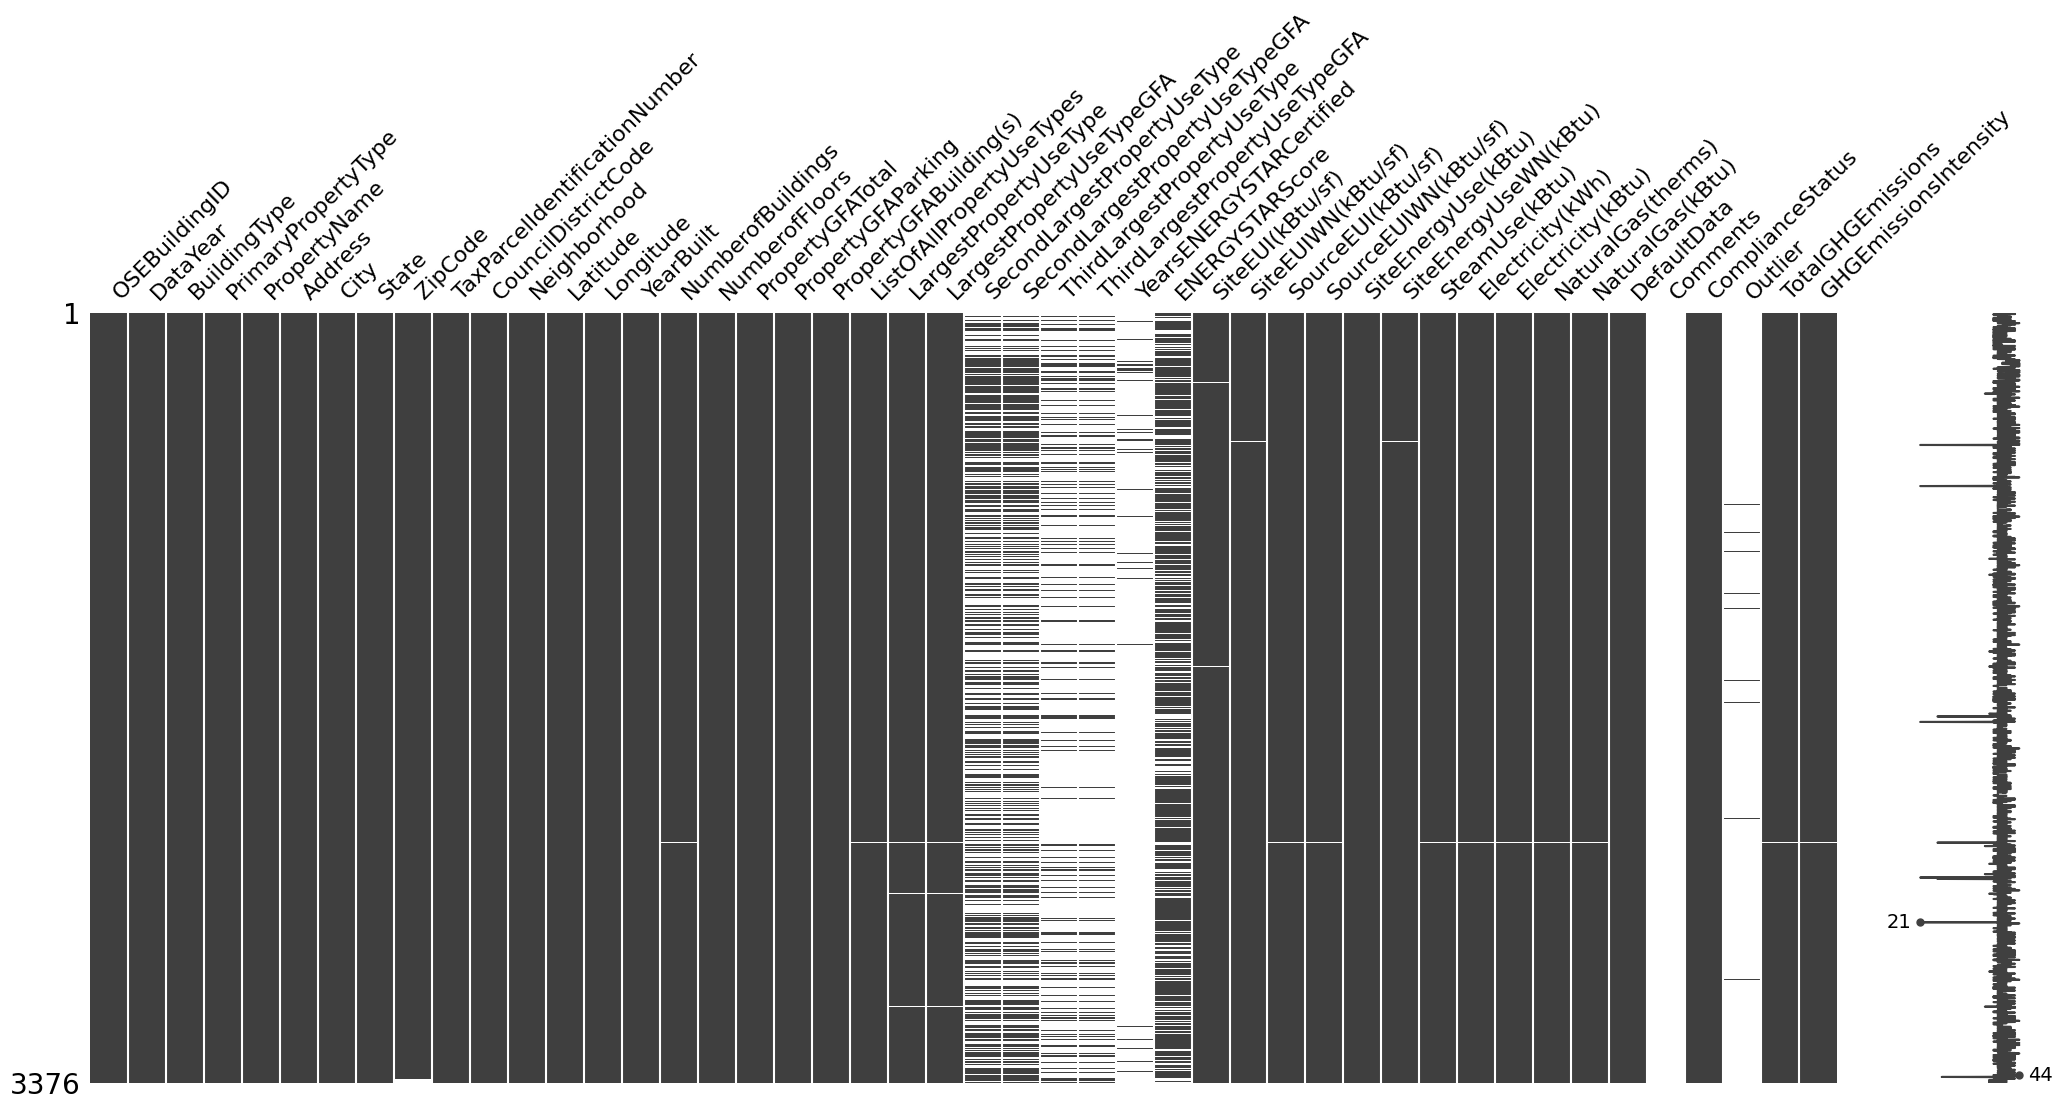

In [13]:
msno.matrix(data);

In [14]:
data.isnull().sum().nlargest(10).sort_values(ascending=False)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
dtype: int64

In [15]:
data['DefaultData'].value_counts()

DefaultData
False    3263
True      113
Name: count, dtype: int64

In [16]:
list_useless = ['OSEBuildingID',
                'City',
                'State',
                'DataYear',
                'PropertyName',
                'Comments',
                'Outlier',
                'YearsENERGYSTARCertified',
                'DefaultData',
                'TaxParcelIdentificationNumber']

In [17]:
data = data.drop(columns=list_useless)

### Filtrage des bâtiments residentiels

In [18]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [19]:
type_to_filter = ['Multifamily MR (5-9)', 'Multifamily LR (1-4)', 'Multifamily HR (10+)']

data = filter_dataframe(data, 'BuildingType', type_to_filter)

del type_to_filter

Rows before operation: 3376, Rows after: 1668, Number of rows affected: 1708


In [20]:
type_to_filter = ['Residence Hall', 'Low-Rise Multifamily']

data = filter_dataframe(data, 'PrimaryPropertyType', type_to_filter)

del type_to_filter

Rows before operation: 1668, Rows after: 1644, Number of rows affected: 24


In [21]:
data['BuildingType'].value_counts()

BuildingType
NonResidential        1437
SPS-District K-12       98
Nonresidential COS      85
Campus                  23
Nonresidential WA        1
Name: count, dtype: int64

In [22]:
data['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

### NULL VALUES

In [23]:
data.loc[data['SecondLargestPropertyUseTypeGFA'].isnull(), 'SecondLargestPropertyUseTypeGFA'] = 0

In [24]:
data.loc[data['ThirdLargestPropertyUseTypeGFA'].isnull(), 'ThirdLargestPropertyUseTypeGFA'] = 0

### Valeurs null target

In [25]:
data = data[~data['LargestPropertyUseTypeGFA'].isnull()]

In [26]:
data = data.dropna(subset=['TotalGHGEmissions', 'SiteEnergyUse(kBtu)'])

In [27]:
# Suppression des lignes null ou égale à 0 pour nos targets

data = data[data['SiteEnergyUse(kBtu)'] > 0]

data = data[data['TotalGHGEmissions'] > 0]

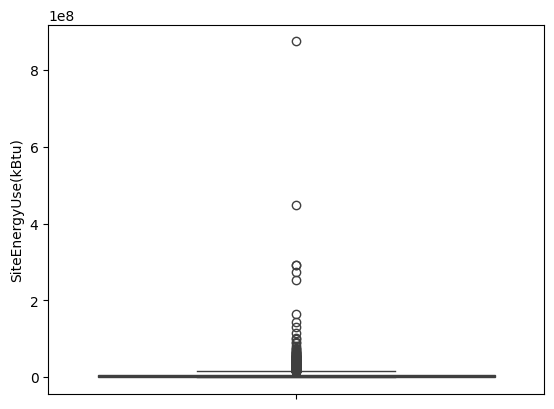

In [28]:
sns.boxplot(data['SiteEnergyUse(kBtu)']);

### Feature energy coef

In [29]:
data['elec_coef'] = data['Electricity(kBtu)']/data['SiteEnergyUse(kBtu)']
data['steam_coef'] = data['SteamUse(kBtu)']/data['SiteEnergyUse(kBtu)']
data['gas_coef'] = data['NaturalGas(kBtu)']/data['SiteEnergyUse(kBtu)']

In [30]:
data['use_gas'] = (data['gas_coef'] > 0).astype(int)
data['use_steam'] = (data['steam_coef'] > 0).astype(int)
data['elec_main'] = (data['elec_coef'] >= 0.8).astype(int)

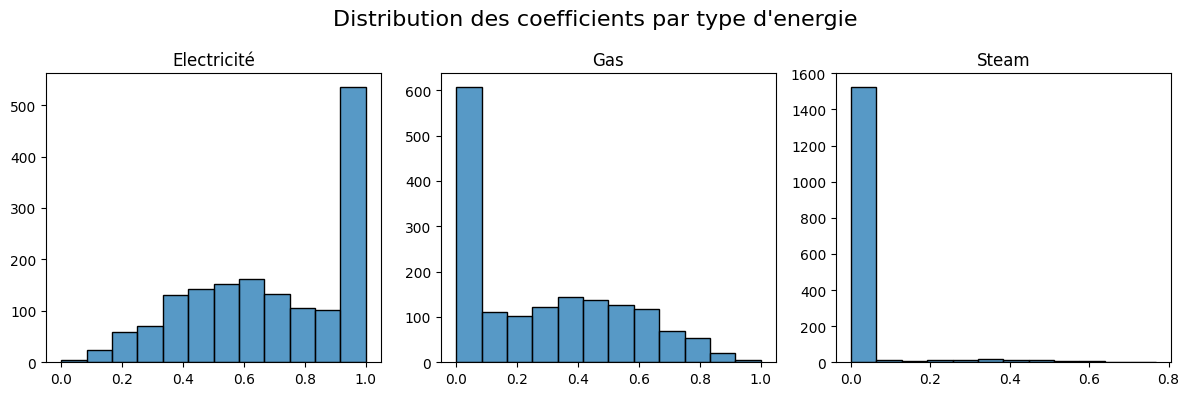

In [31]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
fig.suptitle("Distribution des coefficients par type d'energie", fontsize=16)

sns.histplot(data['elec_coef'], ax=ax[0])
ax[0].set_title("Electricité")

sns.histplot(data['gas_coef'], ax=ax[1])
ax[1].set_title("Gas")

sns.histplot(data['steam_coef'], ax=ax[2])
ax[2].set_title("Steam")

for i in range(3):
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")

plt.tight_layout()
plt.show()

In [32]:
list_del = ['Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)']

data = data.drop(columns=list_del)

del list_del

### Nettoyage colonnes energies (elec/gas/steam)

In [33]:
# Suppression du reste des colonnes energétiques qui ne seront pas target

list_del = ['SiteEUI(kBtu/sf)',
            'SiteEUIWN(kBtu/sf)',
            'SourceEUI(kBtu/sf)',
            'SourceEUIWN(kBtu/sf)',
            'SiteEnergyUseWN(kBtu)',
            'Electricity(kWh)',
            'NaturalGas(therms)',
            'GHGEmissionsIntensity']

data = data.drop(columns=list_del)

del list_del

### Transfo yearbuilt -> age

In [34]:
# Transformation de YearBuilt en nombre d'années depuis la construction

data['age_batiment'] = 2016 - data['YearBuilt']

data = data.drop(columns='YearBuilt')

### Feature engineering nb bat et floor

In [35]:
np.sort(data['NumberofBuildings'].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  14.,  23.,  27., 111.])

In [36]:
np.sort(data['NumberofFloors'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 33, 34, 36, 37,
       39, 41, 42, 46, 47, 49, 55, 56, 63, 76, 99], dtype=int64)

In [37]:
# Remplacement des 0 pour NumberofBuildings and NumberofFloors

for col in ['NumberofFloors', 'NumberofBuildings']:
    
    data.loc[data[col] == 0, col] = 1

In [38]:
data["has_multiple_buildings"] = (data['NumberofBuildings'] > 1).astype(int)

data["has_multiple_floors"] = (data['NumberofFloors'] > 1).astype(int)

### Feature Largest Property Use type

In [39]:
data['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Office                                                  496
Non-Refrigerated Warehouse                              199
K-12 School                                             125
Retail Store                                             99
Other                                                    98
Hotel                                                    76
Worship Facility                                         71
Distribution Center                                      54
Medical Office                                           41
Supermarket/Grocery Store                                40
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       24
Other - Entertainment/Public Assembly                    21
Senior Care Community                                    20
Laboratory       

In [40]:
counts = data['LargestPropertyUseType'].value_counts()

data['LargestPropertyUseType_grouped'] = data['LargestPropertyUseType'].apply(
    lambda x: x if counts[x] >= 5 else 'Other'
)

In [41]:
data[data['LargestPropertyUseType'] == 'Multifamily Housing']

,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),ComplianceStatus,TotalGHGEmissions,elec_coef,steam_coef,gas_coef,use_gas,use_steam,elec_main,age_batiment,has_multiple_buildings,has_multiple_floors,LargestPropertyUseType_grouped
164,NonResidential,Mixed Use Property,516 1st Ave W,98119.0,7,MAGNOLIA / QUEEN ANNE,47.623900,-122.357560,1.0,4,110785,0,110785,"Financial Office, Multifamily Housing, Parking...",Multifamily Housing,58563.0,Supermarket/Grocery Store,48520.0,Parking,29839.0,NaN,1.055791e+07,Compliant,92.91,0.960375,0.0,0.039625,1,0,1,14,0,1,Multifamily Housing
1159,NonResidential,Mixed Use Property,3424 Fremont Ave. N.,98103.0,6,LAKE UNION,47.650200,-122.349590,5.0,3,41827,9226,32601,"Multifamily Housing, Office, Other - Mall, Par...",Multifamily Housing,14273.0,Office,14128.0,Parking,9680.0,NaN,4.193371e+06,Compliant,110.17,0.581655,0.0,0.418345,1,0,0,15,1,1,Multifamily Housing
1839,NonResidential,Mixed Use Property,80 Yesler Way,98104.0,7,DOWNTOWN,47.601950,-122.335160,1.0,3,43878,0,43878,"Multifamily Housing, Non-Refrigerated Warehous...",Multifamily Housing,12000.0,Office,8262.0,Retail Store,6312.0,NaN,7.697713e+05,Compliant,5.37,1.000000,0.0,0.000000,0,0,1,103,0,1,Multifamily Housing
2314,NonResidential,Mixed Use Property,737 Olive Way,98101.0,7,DOWNTOWN,47.613760,-122.334450,1.0,39,1074552,112124,962428,"Hotel, Multifamily Housing, Parking",Multifamily Housing,311521.0,Hotel,303000.0,Parking,141450.0,65.0,2.641677e+07,Compliant,449.59,0.782230,0.0,0.217770,1,0,0,7,0,1,Multifamily Housing
2394,NonResidential,Mixed Use Property,5401 26th Ave NE,98105.0,4,NORTHEAST,47.668270,-122.299780,1.0,4,32282,6985,25297,"Multifamily Housing, Office, Other, Parking",Multifamily Housing,12600.0,Parking,6985.0,Other,6576.0,NaN,1.391714e+06,Compliant,34.62,0.611948,0.0,0.388052,1,0,0,19,0,1,Multifamily Housing
2748,NonResidential,Mixed Use Property,525 MAYNARD AVE S,98104.0,2,DOWNTOWN,47.597690,-122.325370,1.0,3,20620,0,20620,"Multifamily Housing, Retail Store, Social/Meet...",Multifamily Housing,10060.0,Retail Store,5280.0,Social/Meeting Hall,5280.0,NaN,7.474569e+05,Compliant,20.78,0.548606,0.0,0.451395,1,0,0,107,0,1,Multifamily Housing
3003,NonResidential,Mixed Use Property,1600 E. Madison St.,98122.0,3,EAST,47.615540,-122.310980,1.0,5,53034,14625,38409,"Multifamily Housing, Parking, Supermarket/Groc...",Multifamily Housing,22486.0,Supermarket/Grocery Store,14257.0,Parking,13308.0,93.0,3.392129e+06,Compliant,83.65,0.616611,0.0,0.383389,1,0,0,18,0,1,Multifamily Housing
3041,NonResidential,Mixed Use Property,1700 E Madison St,98122.0,3,Central,47.616080,-122.309670,1.0,6,97229,0,97229,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,45300.0,Parking,35973.0,Retail Store,16956.0,100.0,1.021755e+06,Compliant,7.12,0.999999,0.0,0.000000,0,0,1,12,0,1,Multifamily Housing
3087,NonResidential,Mixed Use Property,410 2nd Avenue Extenstion South,98104.0,3,EAST,47.599016,-122.331508,1.0,3,22168,0,22168,"Multifamily Housing, Other - Entertainment/Pub...",Multifamily Housing,11084.0,Other - Entertainment/Public Assembly,11084.0,NaN,0.0,NaN,1.784385e+06,Compliant,49.44,0.550596,0.0,0.449404,1,0,0,116,0,1,Multifamily Housing


In [42]:
data['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    289
Other                          248
Warehouse                      187
Large Office                   173
K-12 School                    125
Mixed Use Property             113
Retail Store                    91
Hotel                           75
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           27
University                      24
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

### Feature has_multiple_usage

In [43]:
data['has_two_usage'] = (~data['SecondLargestPropertyUseType'].isnull()).astype(int)

data['has_three_usage'] = (~data['ThirdLargestPropertyUseType'].isnull()).astype(int)

### Feature distance_from_citycenter

In [44]:
citycenter_coordinates = (47.620564, -122.350616)

data['distance_to_center'] = data.apply(
    lambda row: geodesic((row['Latitude'], row['Longitude']), citycenter_coordinates).km,
    axis=1
)

### Mise en forme de la colonne 'Neighborhood'

In [45]:
# Correction et standardisation des quartiers

data.loc[:, 'Neighborhood'] = data.loc[:, 'Neighborhood'].str.lower()

data.loc[data['Neighborhood'] == 'delridge neighborhoods', 'Neighborhood'] = 'delridge'

In [46]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'elec_coef', 'steam_coef', 'gas_coef', 'use_gas', 'use_steam',
       'elec_main', 'age_batiment', 'has_multiple_buildings',
       'has_multiple_floors', 'LargestPropertyUseType_grouped',
       'has_two_usage', 'has_three_usage', 'distance_to_center'],
      dtype='object')

### Etude des relations avec variable cible

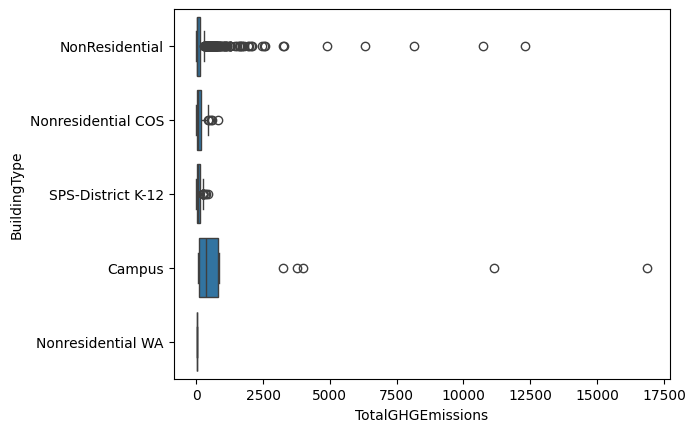

In [47]:
sns.boxplot(data, y='BuildingType', x='TotalGHGEmissions');

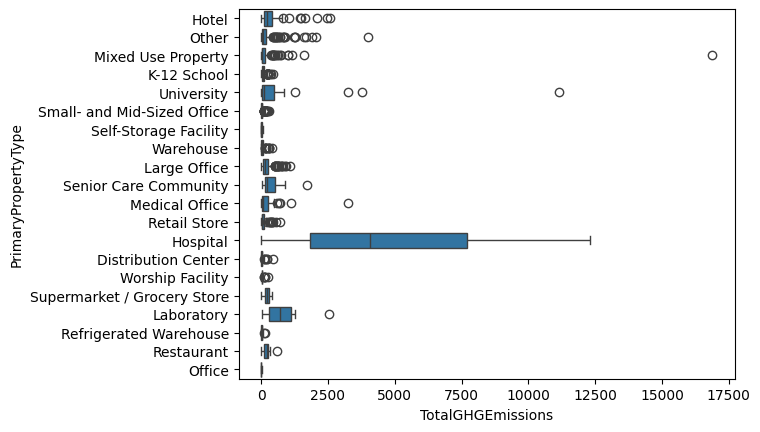

In [48]:
sns.boxplot(data, y='PrimaryPropertyType', x='TotalGHGEmissions');

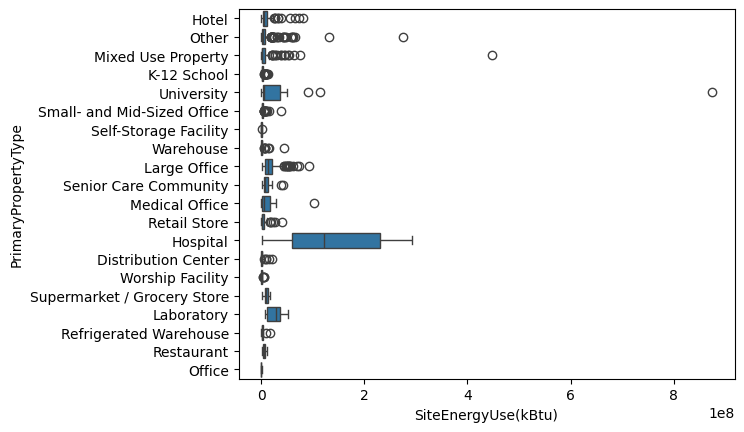

In [49]:
sns.boxplot(data, y='PrimaryPropertyType', x='SiteEnergyUse(kBtu)');

### Zone à haute emissions

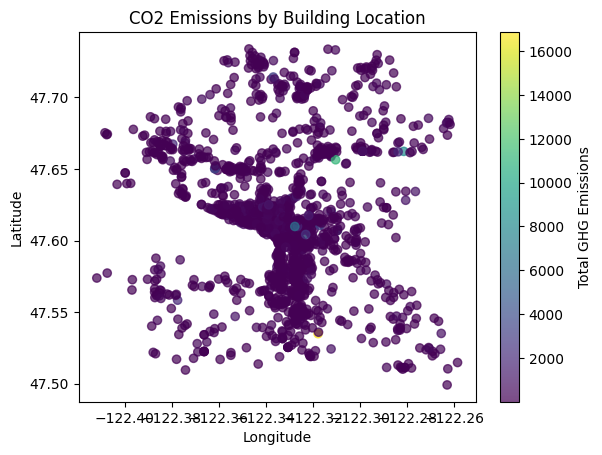

In [50]:
plt.scatter(data['Longitude'], data['Latitude'], c=data['TotalGHGEmissions'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Total GHG Emissions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('CO2 Emissions by Building Location')
plt.show()

### Traitement des outliers

In [51]:
pd.set_option('display.float_format', '{:,.2f}'.format)
display(data[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']].describe().round(2))
pd.reset_option('display.float_format')

,SiteEnergyUse(kBtu),TotalGHGEmissions
count,"1,620.00","1,620.00"
mean,"8,608,739.09",188.23
std,"30,647,988.57",762.18
min,"16,808.90",0.12
25%,"1,253,390.09",20.32
50%,"2,588,369.00",49.74
75%,"7,103,784.25",144.50
max,"873,923,712.00","16,870.98"


In [52]:
### Traitement des outliers avec Z score

treshold = 2

scaler = StandardScaler()

data['z_energie'] = scaler.fit_transform(data[['SiteEnergyUse(kBtu)']])
data['z_co2'] = scaler.fit_transform(data[['TotalGHGEmissions']])
data['z_building'] = scaler.fit_transform(data[['PropertyGFABuilding(s)']])

print(data.shape)

data = data[
    (data['z_energie'] < treshold) &
    (data['z_co2'] < treshold) &
    (data['z_building'] < treshold)
]

print(data.shape)

(1620, 40)
(1574, 40)


## Traitement des outliers avec IQR

limite_energie = limite_haute(data['SiteEnergyUse(kBtu)'])
limite_co2 = limite_haute(data['TotalGHGEmissions'])
limite_gfabuildings = limite_haute(data['PropertyGFABuilding(s)'])

list_outliers = set()

list_outliers.update(data[data['SiteEnergyUse(kBtu)'] > limite_energie].index)

list_outliers.update(data[data['TotalGHGEmissions'] > limite_co2].index)

list_outliers.update(data[data['PropertyGFABuilding(s)'] > limite_gfabuildings].index)

data_outlier = data.loc[data.index.isin(list_outliers),:]

data = data.loc[~data.index.isin(list_outliers),:]

In [53]:
data.shape

(1574, 40)

In [54]:
data.head()

,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),ComplianceStatus,TotalGHGEmissions,elec_coef,steam_coef,gas_coef,use_gas,use_steam,elec_main,age_batiment,has_multiple_buildings,has_multiple_floors,LargestPropertyUseType_grouped,has_two_usage,has_three_usage,distance_to_center,z_energie,z_co2,z_building
0,NonResidential,Hotel,405 Olive way,98101.0,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,0.0,NaN,0.0,60.0,7226362.5,Compliant,249.98,0.546060,0.277302,0.176638,1,1,0,89,0,1,Hotel,0,0,1.328806,-0.045119,0.081042,-0.062266
1,NonResidential,Hotel,724 Pine street,98101.0,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,8387933.0,Compliant,295.86,0.386609,0.000000,0.613391,1,0,0,20,0,1,Hotel,1,1,1.499773,-0.007207,0.141257,-0.062029
3,NonResidential,Hotel,620 STEWART ST,98101.0,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,0.0,NaN,0.0,56.0,6794584.0,Compliant,286.43,0.407519,0.325913,0.266567,1,1,0,90,0,1,Hotel,0,0,1.271688,-0.059212,0.128881,-0.156963
4,NonResidential,Hotel,401 LENORA ST,98121.0,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,14172606.0,Compliant,505.01,0.378802,0.000000,0.621198,1,0,0,36,0,1,Hotel,1,1,1.075044,0.181597,0.415753,0.025557
5,Nonresidential COS,Other,810 Virginia St,98101.0,7,downtown,47.61623,-122.33657,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,NaN,0.0,NaN,0.0,NaN,12086616.0,Compliant,301.81,0.609884,0.000000,0.390116,1,0,0,17,0,1,Other,0,0,1.160650,0.113513,0.149066,-0.161258


In [55]:
# Changement du building type Nonresidential WA

data.loc[data['BuildingType'] == 'Nonresidential WA', 'BuildingType'] = 'NonResidential'


data['BuildingType'].value_counts()

BuildingType
NonResidential        1388
Nonresidential COS      84
SPS-District K-12       84
Campus                  18
Name: count, dtype: int64

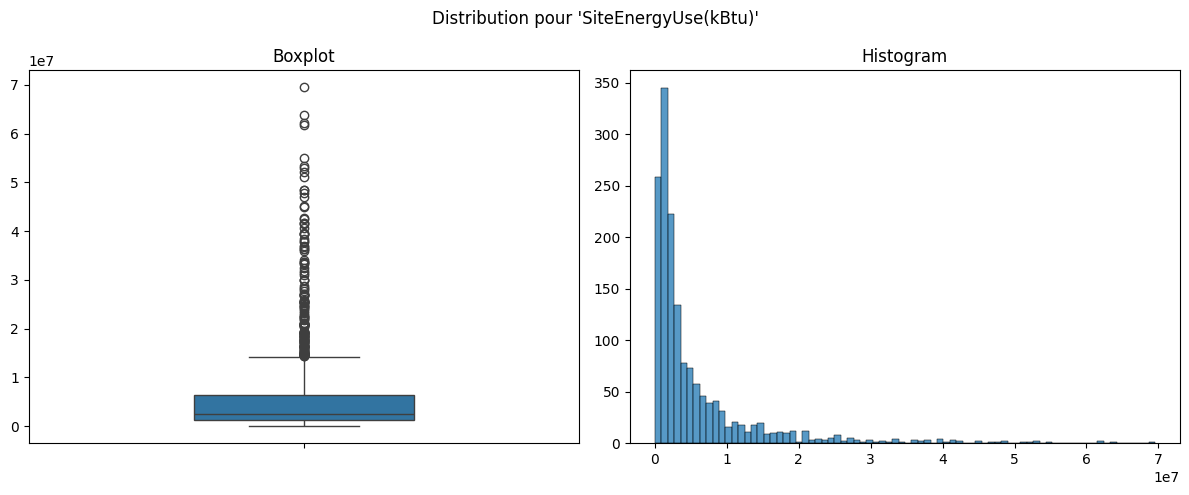

In [56]:
plot_histbox(data, 'SiteEnergyUse(kBtu)')

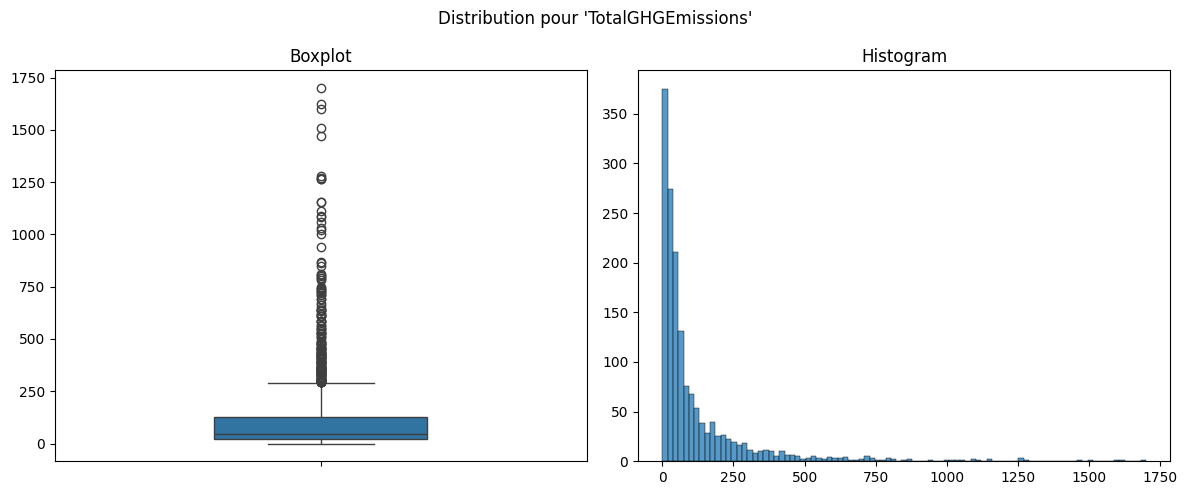

In [57]:
plot_histbox(data, 'TotalGHGEmissions')

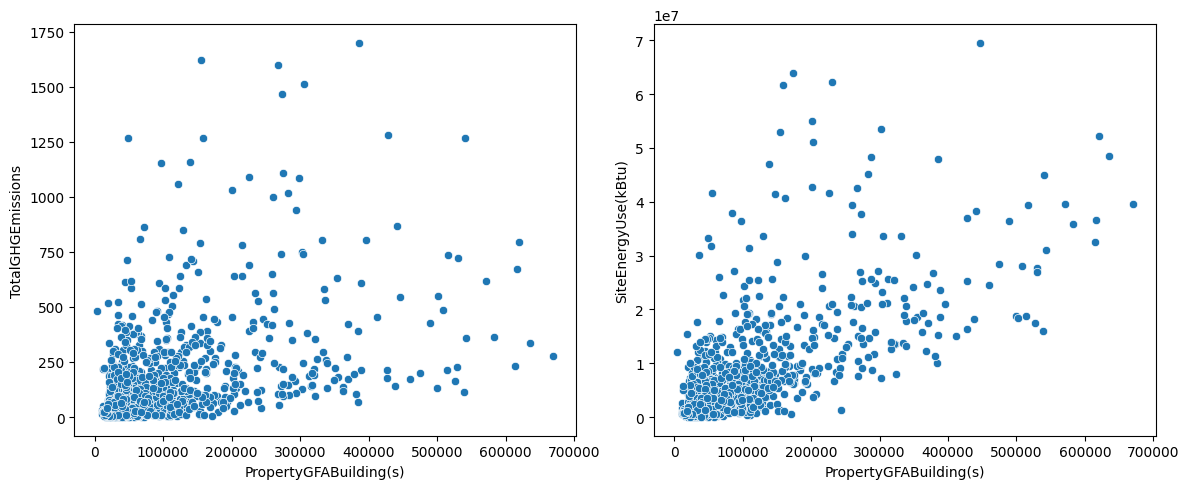

In [58]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data, x='PropertyGFABuilding(s)', y='TotalGHGEmissions', ax=ax[0])
sns.scatterplot(data, x='PropertyGFABuilding(s)', y='SiteEnergyUse(kBtu)', ax=ax[1])

plt.tight_layout()
plt.show();

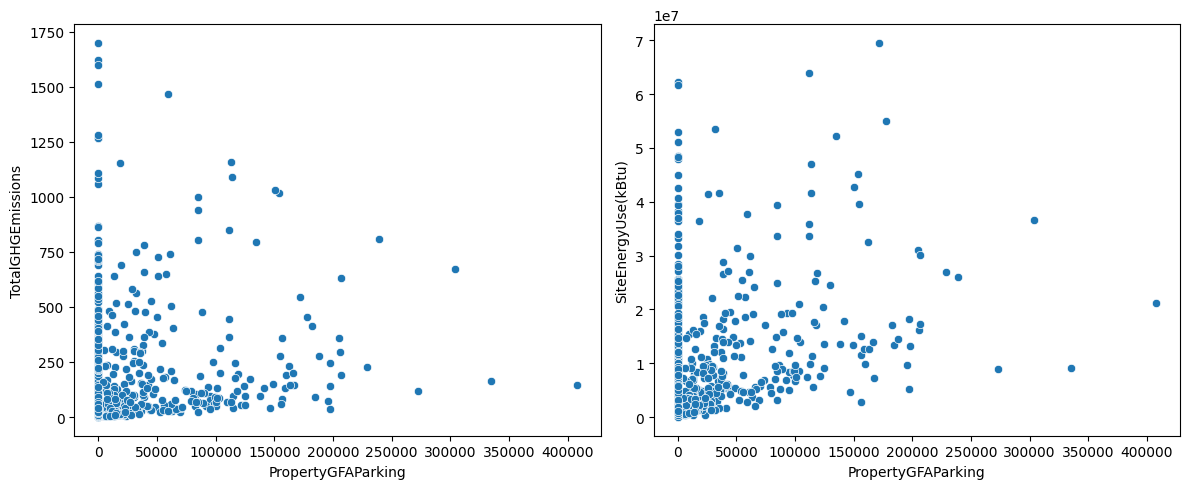

In [59]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data, x='PropertyGFAParking', y='TotalGHGEmissions', ax=ax[0])
sns.scatterplot(data, x='PropertyGFAParking', y='SiteEnergyUse(kBtu)', ax=ax[1])

plt.tight_layout()
plt.show();

In [60]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'elec_coef', 'steam_coef', 'gas_coef', 'use_gas', 'use_steam',
       'elec_main', 'age_batiment', 'has_multiple_buildings',
       'has_multiple_floors', 'LargestPropertyUseType_grouped',
       'has_two_usage', 'has_three_usage', 'distance_to_center', 'z_energie',
       'z_co2', 'z_building'],
      dtype='object')

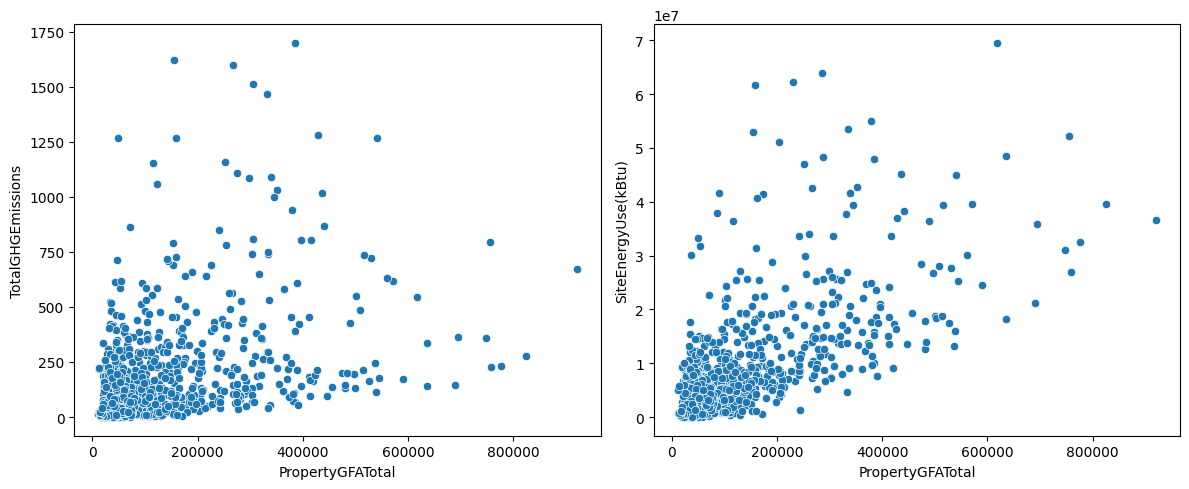

In [61]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data, x='PropertyGFATotal', y='TotalGHGEmissions', ax=ax[0])
sns.scatterplot(data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', ax=ax[1])

plt.tight_layout()
plt.show();

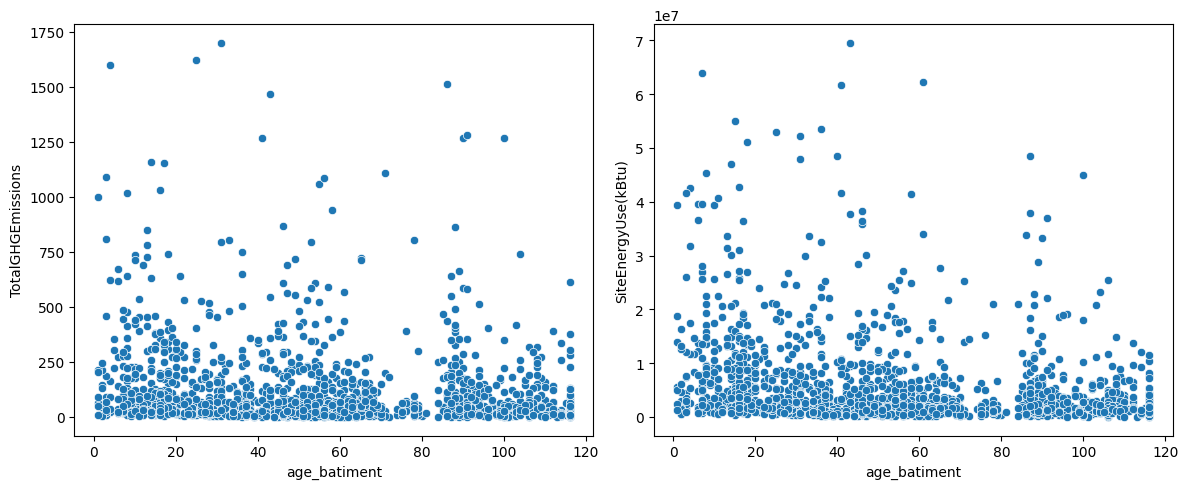

In [62]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(data, x='age_batiment', y='TotalGHGEmissions', ax=ax[0])
sns.scatterplot(data, x='age_batiment', y='SiteEnergyUse(kBtu)', ax=ax[1])

plt.tight_layout()
plt.show();

### Feature cluster Kmean lat/long

In [63]:
from sklearn.metrics import silhouette_score

In [64]:
X = data[['Latitude', 'Longitude']].to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

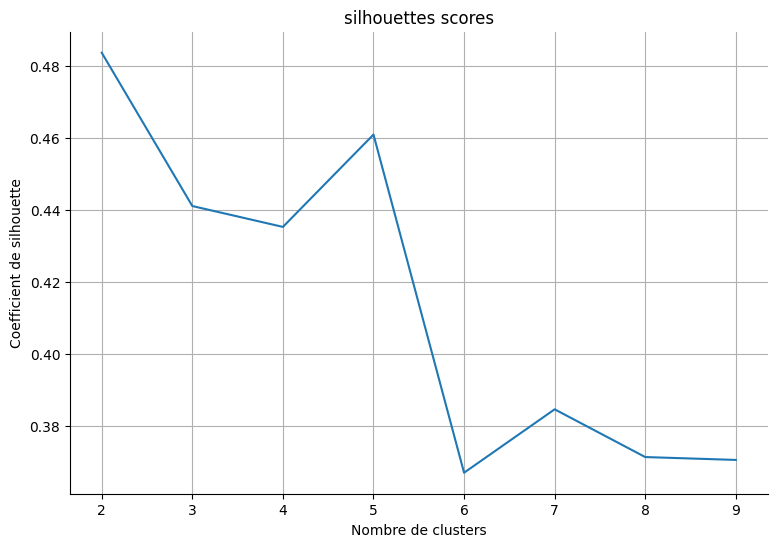

In [65]:
K_range = range(2, 10)
silhouette_scores = []

for n_clusters in K_range:
    km = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    km_labels = km.predict(X)
    si_coef = silhouette_score(X, km_labels)   
    silhouette_scores.append(si_coef)
    
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(1,1,1)
plt.plot(K_range, silhouette_scores)
ax.set_title('silhouettes scores')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Coefficient de silhouette')
plt.grid()
plt.show()

In [66]:
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(data[['Latitude', 'Longitude']])

kmeans = KMeans(n_clusters=5, random_state=42)
data['spacial_cluster'] = (kmeans.fit_predict(coords_scaled) + 1).astype(str)

In [67]:
data['spacial_cluster'].value_counts()

spacial_cluster
3    722
4    288
1    262
5    223
2     79
Name: count, dtype: int64

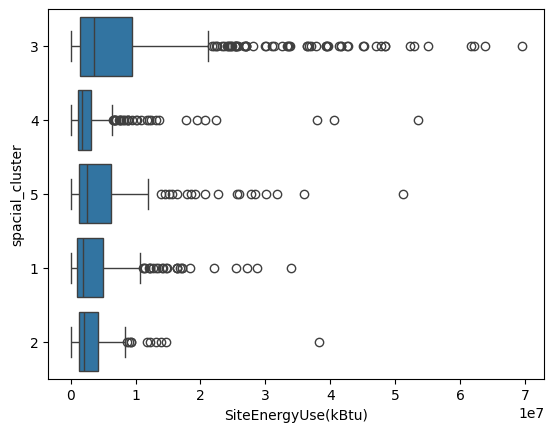

In [68]:
sns.boxplot(data, x='SiteEnergyUse(kBtu)', y='spacial_cluster');

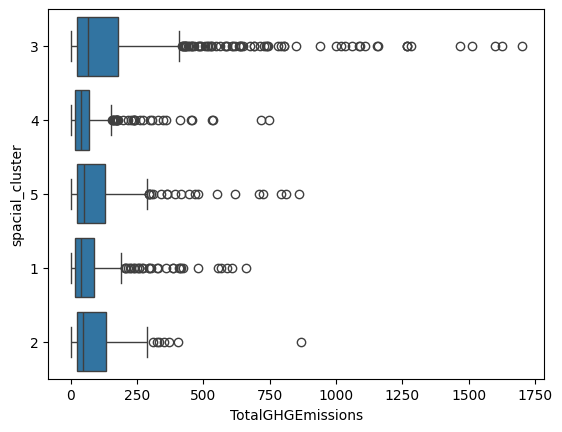

In [69]:
sns.boxplot(data, x='TotalGHGEmissions', y='spacial_cluster');

# Modele

In [70]:
data.loc[data['ENERGYSTARScore'].isnull(), 'ENERGYSTARScore'] = data['ENERGYSTARScore'].mean()

In [71]:
### Combining neihgborhood and district code

data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype(str)

data['neighdistrict'] = data['Neighborhood'] + '_' + data['CouncilDistrictCode']

### Grouping Primarypropertytype

In [72]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'elec_coef', 'steam_coef', 'gas_coef', 'use_gas', 'use_steam',
       'elec_main', 'age_batiment', 'has_multiple_buildings',
       'has_multiple_floors', 'LargestPropertyUseType_grouped',
       'has_two_usage', 'has_three_usage', 'distance_to_center', 'z_energie',
       'z_co2', 'z_building', 'spacial_cluster', 'neighdistrict'],
      dtype='object')

In [73]:
data['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    289
Other                          242
Warehouse                      186
Large Office                   159
K-12 School                    125
Mixed Use Property             109
Retail Store                    89
Worship Facility                71
Hotel                           71
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  38
Self-Storage Facility           27
University                      21
Senior Care Community           18
Refrigerated Warehouse          12
Restaurant                      11
Laboratory                       9
Office                           3
Hospital                         2
Name: count, dtype: int64

data.loc[data['PrimaryPropertyType'] == 'Small- and Mid-Sized Office', 'PrimaryPropertyType'] = 'Office'
data.loc[data['PrimaryPropertyType'].isin(['Supermarket / Grocery Store', 'Restaurant']), 'PrimaryPropertyType'] = 'Retail Store'
data.loc[data['PrimaryPropertyType'].isin(['Hospital','Laboratory']), 'PrimaryPropertyType'] = 'Medical'
data.loc[data['PrimaryPropertyType'].isin(['Self-Storage Facility', 'Warehouse', 'Worship Facility', 'Distribution Center']), 'PrimaryPropertyType'] = 'Other'

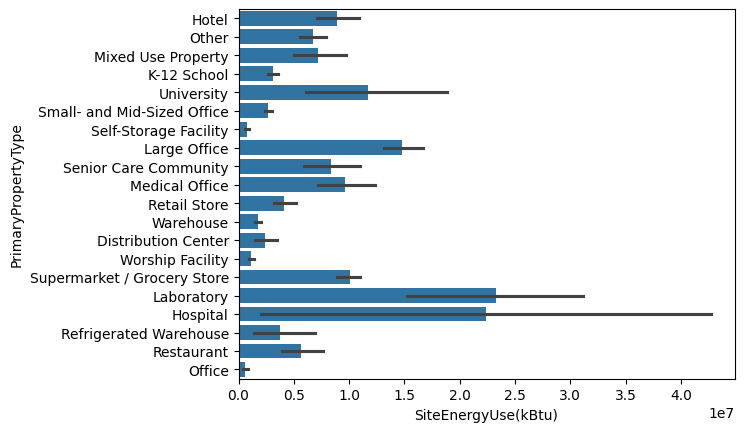

In [74]:
sns.barplot(data, x='SiteEnergyUse(kBtu)', y='PrimaryPropertyType');

In [75]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Address', 'ZipCode',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'ComplianceStatus', 'TotalGHGEmissions',
       'elec_coef', 'steam_coef', 'gas_coef', 'use_gas', 'use_steam',
       'elec_main', 'age_batiment', 'has_multiple_buildings',
       'has_multiple_floors', 'LargestPropertyUseType_grouped',
       'has_two_usage', 'has_three_usage', 'distance_to_center', 'z_energie',
       'z_co2', 'z_building', 'spacial_cluster', 'neighdistrict'],
      dtype='object')

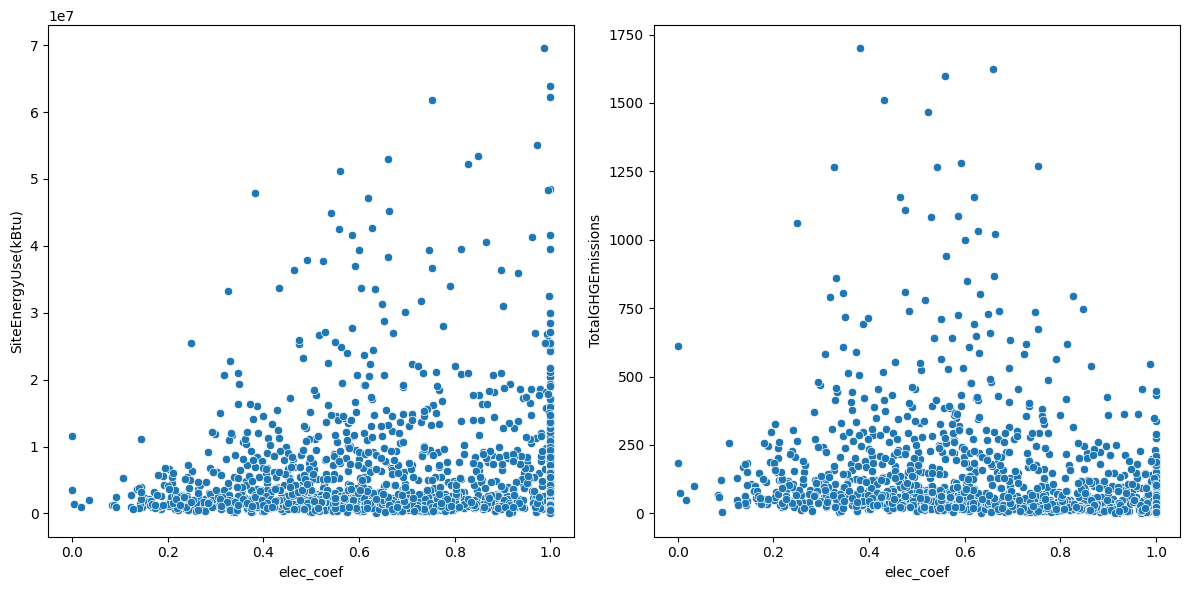

In [76]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.scatterplot(data, x='elec_coef', y='SiteEnergyUse(kBtu)', ax=ax[0])
sns.scatterplot(data, x='elec_coef', y='TotalGHGEmissions', ax=ax[1])

plt.tight_layout()
plt.show()

### Encoding

In [77]:
features = [
    #'BuildingType',
    #'neighdistrict',
    #'CouncilDistrictCode',
    #'LargestPropertyUseType',
    #'LargestPropertyUseType_grouped',
    #'LargestPropertyUseTypeGFA',
    #'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseTypeGFA',
    #'Neighborhood',
    #'PropertyGFATotal',
    'PropertyGFAParking',
    'PropertyGFABuilding(s)',
    'elec_coef',
    'steam_coef',
    #'gas_coef',
    'age_batiment',
    #'has_multiple_floors',
    'has_multiple_buildings',
    #'NumberofBuildings',
    'NumberofFloors',
    'PrimaryPropertyType',
    'ENERGYSTARScore',
    'has_two_usage',
    #'has_three_usage',
    'distance_to_center',
    #'use_gas',
    #'use_steam',
    #'elec_main'
    #'spacial_cluster'
            ]

column_to_encode = [
    #'neighdistrict',
    #'CouncilDistrictCode',
    #'LargestPropertyUseType',
    #'LargestPropertyUseType_grouped',
    #'Neighborhood',
    #'BuildingType',
    'PrimaryPropertyType',
    #'spacial_cluster'
    ]

columns_to_scale = [
    'elec_coef',
    'steam_coef',
    #'NumberofBuildings',
    'NumberofFloors',
    #'gas_coef',
    #'PropertyGFATotal',
    'PropertyGFAParking', 
    'PropertyGFABuilding(s)',
    #'LargestPropertyUseTypeGFA',
    #'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseTypeGFA',    
    'age_batiment',
    'ENERGYSTARScore',
    'distance_to_center'
    ]

In [78]:
X = data.loc[:, features]

In [79]:
#y1 = np.log1p(data.loc[:, 'SiteEnergyUse(kBtu)'])
y1 = data.loc[:, 'SiteEnergyUse(kBtu)']

#y2 = np.log1p(data.loc[:, 'TotalGHGEmissions'])
y2 = data.loc[:, 'TotalGHGEmissions']

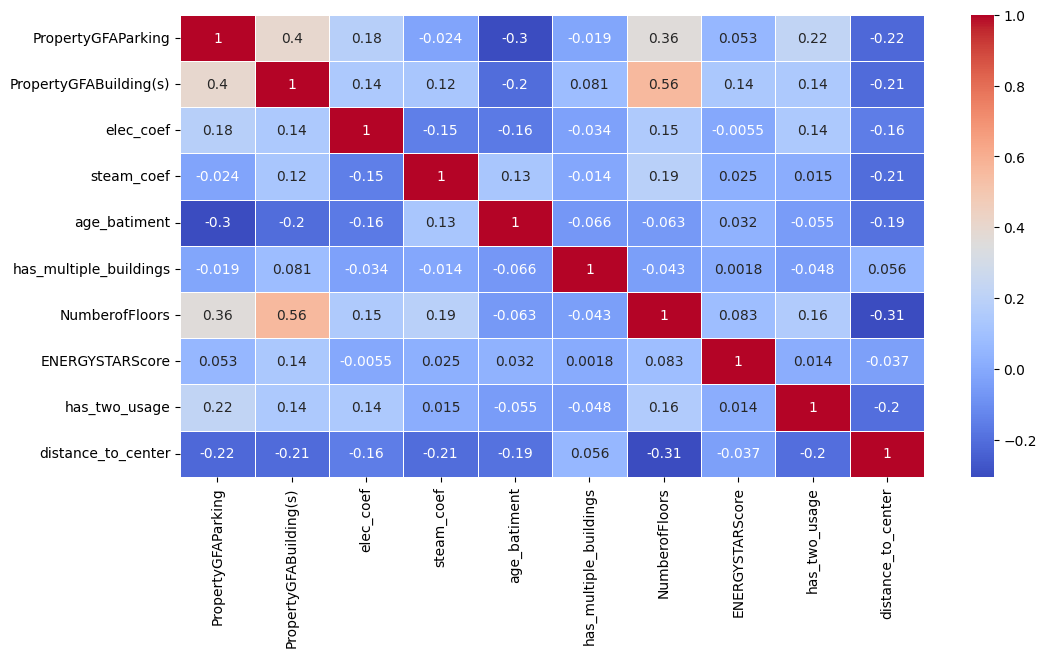

In [80]:
corr_table = X.corr(numeric_only=True)
plt.figure(figsize=(12, 6))
sns.heatmap(corr_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show();

In [81]:
X = pd.get_dummies(X, columns=column_to_encode, dtype=int)

In [82]:
X

,PropertyGFAParking,PropertyGFABuilding(s),elec_coef,steam_coef,age_batiment,has_multiple_buildings,NumberofFloors,ENERGYSTARScore,has_two_usage,distance_to_center,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility
0,0,88434,0.546060,0.277302,89,0,12,60.00000,0,1.328806,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15064,88502,0.386609,0.000000,20,0,11,61.00000,1,1.499773,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,61320,0.407519,0.325913,90,0,10,56.00000,0,1.271688,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,62000,113580,0.378802,0.000000,36,0,18,75.00000,1,1.075044,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,37198,60090,0.609884,0.000000,17,0,2,65.35942,0,1.160650,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,0,12294,0.616974,0.000000,26,0,1,46.00000,0,6.619118,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3372,0,16000,0.417296,0.000000,12,0,1,65.35942,0,3.416503,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3373,0,13157,0.310820,0.000000,42,0,1,65.35942,1,1.846761,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3374,0,14101,0.484898,0.000000,27,0,1,65.35942,1,10.445102,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### PCA 

In [83]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

pca = PCA()

pca.fit(X_scaled)

PCA()

In [84]:
df_components = pd.DataFrame(columns=[f"P{x}" for x in range(1,len(X.columns)+1)], data=pca.components_)

df_var = pd.DataFrame(columns=[f"P{x}" for x in range(1,len(X.columns)+1)], data=[pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)])

In [85]:
df_var

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30
0,0.099663,0.056755,0.054657,0.045811,0.042757,0.041430,0.037828,0.037147,0.035953,0.035560,0.035130,0.034590,0.034335,0.034186,0.034000,0.033749,0.033699,0.033478,0.033432,0.031068,0.026976,0.025345,0.023346,0.021065,0.019501,0.017879,0.014972,0.013971,0.011717,0.0
1,0.099663,0.156418,0.211075,0.256887,0.299643,0.341073,0.378901,0.416048,0.452001,0.487561,0.522691,0.557281,0.591616,0.625802,0.659802,0.693551,0.727251,0.760728,0.794160,0.825229,0.852204,0.877549,0.900895,0.921961,0.941462,0.959340,0.974312,0.988283,1.000000,1.0


### Paramètres

In [86]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

In [87]:
X[columns_to_scale] = X[columns_to_scale].astype(float)
X.loc[:, columns_to_scale] = scaler.fit_transform(X.loc[:, columns_to_scale])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2)

### Regression linéaire

In [89]:
def test_regression(X, y, cv) -> dict:
    
    reg = LinearRegression()
    
    mse_scorer = make_scorer(mean_squared_error) 
    mae_scorer = make_scorer(mean_absolute_error, ) 
    mape_scorer = make_scorer(mean_absolute_percentage_error)
    
    cv_results = cross_validate(
        reg, X, y,
        cv=cv, 
        scoring={'R2': 'r2', 'MSE': mse_scorer, 'MAE': mae_scorer, 'MAPE': mape_scorer},
        return_train_score=True
    ) 

    result = {
        'avg_r2_train' : np.mean(cv_results['train_R2']),
        'avg_r2_test' : np.mean(cv_results['test_R2']),
        'avg_mse' : np.mean(cv_results['test_MSE']),
        'avg_mae' : np.mean(cv_results['test_MAE']),
        'avg_mape' : np.mean(cv_results['test_MAPE'])
    }
    
    return result

In [90]:
cv = 3

print(test_regression(X, y1, cv))

print('---')

print(test_regression(X, y2, cv))

{'avg_r2_train': 0.6195286595468144, 'avg_r2_test': 0.4410710929068962, 'avg_mse': 31205013120794.47, 'avg_mae': 3032432.969898008, 'avg_mape': 1.8307733606161747}
---
{'avg_r2_train': 0.5735634853514958, 'avg_r2_test': 0.3741189161717083, 'avg_mse': 19298.538884931037, 'avg_mae': 81.17091342888787, 'avg_mape': 4.209349400651285}


### Decision Tree

In [91]:
def test_decisiontree_reg(X, y, cv) -> dict:
    
    param_grid = {
        'max_depth': [3, 5, 10, 15, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 10]
    }

    grid_search = GridSearchCV(
        estimator=DecisionTreeRegressor(),
        param_grid=param_grid,
        scoring='r2',
        cv=cv,
        n_jobs=-1
    )
    
    grid_search.fit(X, y)
    best_reg = grid_search.best_estimator_
    
    mse_scorer = make_scorer(mean_squared_error)
    mae_scorer = make_scorer(mean_absolute_error)
    mape_scorer = make_scorer(mean_absolute_percentage_error)
    
    cv_results = cross_validate(
        best_reg, X, y,
        cv=cv, 
        scoring={'R2': 'r2', 'MSE': mse_scorer, 'MAE': mae_scorer, 'MAPE': mape_scorer},
        return_train_score=True
    ) 

    result = {
        'best_params': grid_search.best_params_,
        'avg_r2_train': np.mean(cv_results['train_R2']),
        'avg_r2_test': np.mean(cv_results['test_R2']),
        'avg_mse': np.mean(cv_results['test_MSE']),
        'avg_mae': np.mean(cv_results['test_MAE']),
        'avg_mape': np.mean(cv_results['test_MAPE'])
    }
    
    return result


In [92]:
cv = 5

print(test_decisiontree_reg(X, y1, cv))

print('---')

print(test_decisiontree_reg(X, y2, cv))

{'best_params': {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20}, 'avg_r2_train': 0.7197779505584398, 'avg_r2_test': 0.3679095573485592, 'avg_mse': 34889538255122.6, 'avg_mae': 3030093.8452747157, 'avg_mape': 1.4591314668670168}
---
{'best_params': {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}, 'avg_r2_train': 0.8352348578038967, 'avg_r2_test': 0.3180377630230947, 'avg_mse': 22669.599913188147, 'avg_mae': 72.65801019298797, 'avg_mape': 1.3071578633987475}


In [93]:
reg_tree = DecisionTreeRegressor(
    max_depth=5,
    random_state=808
)

reg_tree.fit(X_train, y_train)

y_pred_test = reg_tree.predict(X_test)

RMSE = mean_squared_error(y_pred_test, y_test)
MAPE = mean_absolute_percentage_error(y_pred_test, y_test)
R2_train = reg_tree.score(X_train, y_train)
R2_test = reg_tree.score(X_test, y_test)

new_row = ['Decision Tree', R2_train, R2_test, RMSE, MAPE]

print(f"R² train: {R2_train}")
print(f"R² test: {R2_test}")
print("------")
print(f"RMSE: {RMSE}")
print(f"MAPE: {MAPE}")

R² train: 0.7466153055194775
R² test: 0.544451426659409
------
RMSE: 32742568913584.61
MAPE: 0.6323963145942676


In [94]:
scores = []
for depth in np.arange(2, 30, 2):
    reg_tree = DecisionTreeRegressor(
        max_depth = depth,
        random_state = 808
    )

    reg_tree.fit(X_train, y_train)

    R2_train = reg_tree.score(X_train, y_train)
    R2_test = reg_tree.score(X_test, y_test)
    
    scores.append({
        'max_depth': depth,
        'train': R2_train,
        'test': R2_test,
    })

scores = pd.DataFrame(scores)

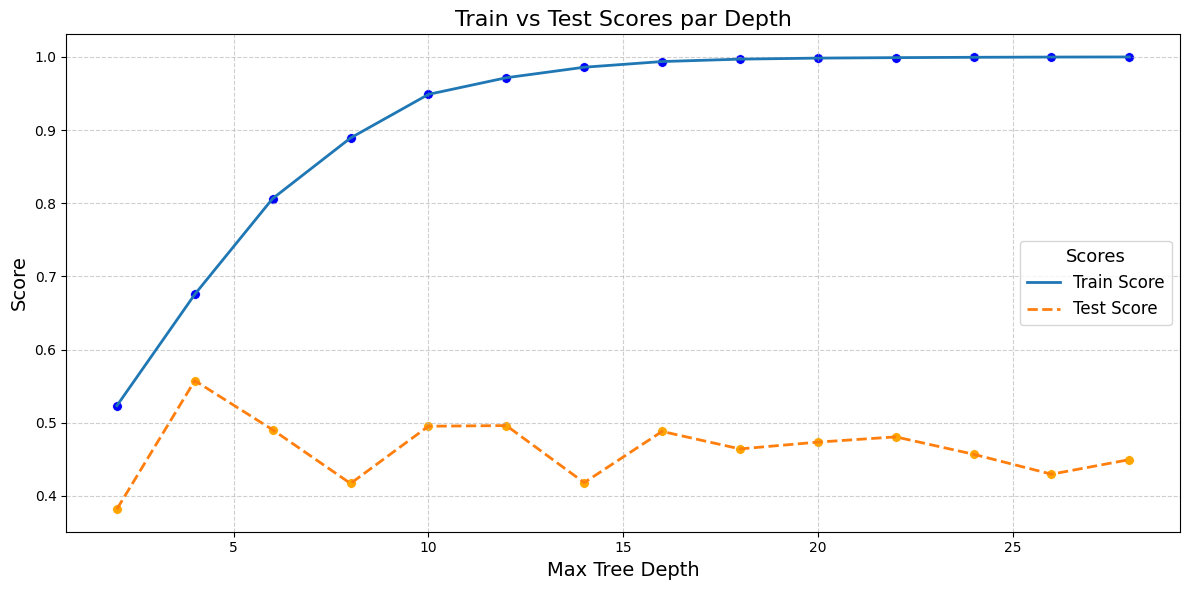

In [95]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=scores, x='max_depth', y='train', ax=ax, label='Train Score', linewidth=2, linestyle='-')
sns.scatterplot(data=scores, x='max_depth', y='train', ax=ax, s=50, label=None, color='blue')

sns.lineplot(data=scores, x='max_depth', y='test', ax=ax, label='Test Score', linewidth=2, linestyle='--')
sns.scatterplot(data=scores, x='max_depth', y='test', ax=ax, s=50, label=None, color='orange')

ax.set_title('Train vs Test Scores par Depth', fontsize=16)
ax.set_xlabel('Max Tree Depth', fontsize=14)
ax.set_ylabel('Score', fontsize=14)

ax.grid(visible=True, linestyle='--', alpha=0.6)

ax.legend(title='Scores', fontsize=12, title_fontsize=13, loc='right')

plt.tight_layout()
plt.show()

### Random Forest

In [96]:
tree_counts = [1,2,3,4,5,10,15,20,25,30,40,50, 60, 70, 80, 90, 100, 110, 120]

scores = []
for n_estimator in tree_counts:
    reg_rdtree = RandomForestRegressor(
        n_estimators = n_estimator,
        max_depth = None,
        max_features = None,
        random_state = 8
        )

    reg_rdtree.fit(X_train, y_train)
    R2_train = reg_rdtree.score(X_train, y_train)
    R2_test = reg_rdtree.score(X_test, y_test)
    
    scores.append({
        'tree_count': n_estimator,
        'train': R2_train,
        'test': R2_test,
    })
    
scores = pd.DataFrame(scores)

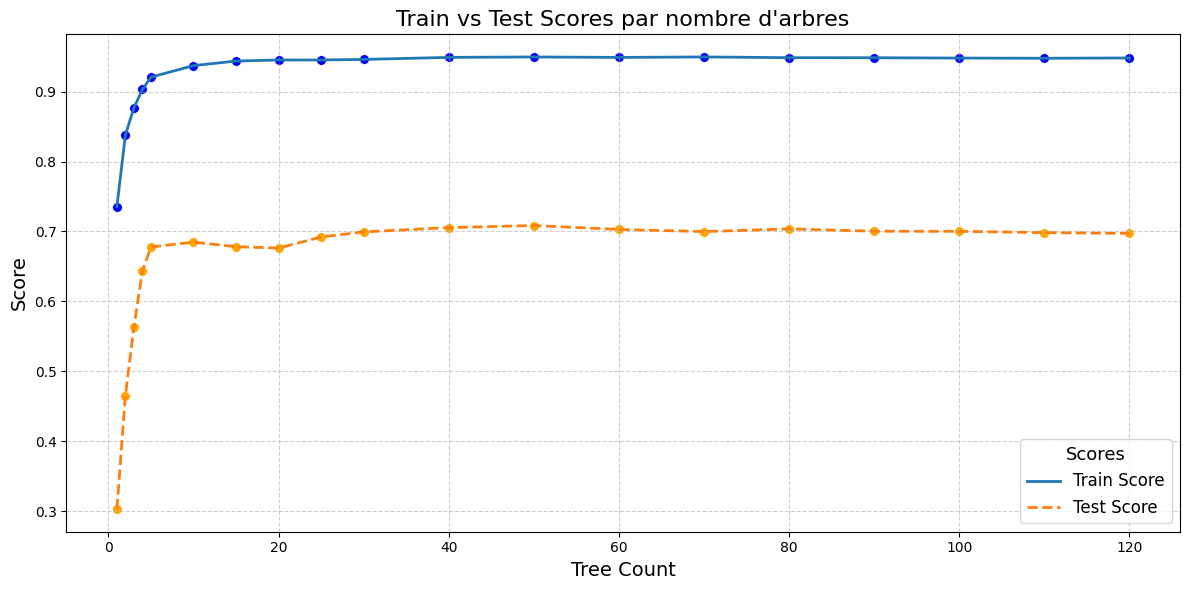

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=scores, x='tree_count', y='train', ax=ax, label='Train Score', linewidth=2, linestyle='-')
sns.scatterplot(data=scores, x='tree_count', y='train', ax=ax, s=50, label=None, color='blue')

sns.lineplot(data=scores, x='tree_count', y='test', ax=ax, label='Test Score', linewidth=2, linestyle='--')
sns.scatterplot(data=scores, x='tree_count', y='test', ax=ax, s=50, label=None, color='orange')

ax.set_title('Train vs Test Scores par nombre d\'arbres', fontsize=16)
ax.set_xlabel('Tree Count', fontsize=14)
ax.set_ylabel('Score', fontsize=14)

ax.grid(visible=True, linestyle='--', alpha=0.6)

ax.legend(title='Scores', fontsize=12, title_fontsize=13, loc='lower right')

plt.tight_layout()
plt.show()

In [98]:
reg_rdtree = RandomForestRegressor(
        n_estimators = 20,
        max_depth = None,
        max_features = None,
        random_state = 8
)

reg_rdtree.fit(X_train, y_train)

y_pred_test = reg_rdtree.predict(X_test)

RMSE = mean_squared_error(y_pred_test, y_test)
MAPE = mean_absolute_percentage_error(y_pred_test, y_test)
R2_train = reg_rdtree.score(X_train, y_train)
R2_test = reg_rdtree.score(X_test, y_test)

new_row = ['Random Forest', R2_train, R2_test, RMSE, MAPE]

print(f"R² train: {R2_train}")
print(f"R² test: {R2_test}")
print("------")
print(f"RMSE: {RMSE}")
print(f"MAPE: {MAPE}")

R² train: 0.945148962522131
R² test: 0.6762670878601125
------
RMSE: 23268313865206.027
MAPE: 0.4322489815965779


In [99]:
def test_randomforest(X, y, param_grid, cv) -> dict:

    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        scoring='r2',
        cv=cv,
        n_jobs=-1
    )
    
    grid_search.fit(X, y)
    best_reg = grid_search.best_estimator_
    
    mse_scorer = make_scorer(mean_squared_error)
    mae_scorer = make_scorer(mean_absolute_error)
    mape_scorer = make_scorer(mean_absolute_percentage_error)
    
    cv_results = cross_validate(
        best_reg, X, y,
        cv=cv, 
        scoring={'R2': 'r2', 'MSE': mse_scorer, 'MAE': mae_scorer, 'MAPE': mape_scorer},
        return_train_score=True
    ) 

    result = {
        'best_params': grid_search.best_params_,
        'avg_r2_train': np.mean(cv_results['train_R2']),
        'avg_r2_test': np.mean(cv_results['test_R2']),
        'avg_mse': np.mean(cv_results['test_MSE']),
        'avg_mae': np.mean(cv_results['test_MAE']),
        'avg_mape': np.mean(cv_results['test_MAPE'])
    }
    
    return result


In [100]:
def plot_feature_importance(X,y, title=""):
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)

    feature_importances = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False).nlargest(20,'Importance')
    
    feature_importances = feature_importances.iloc[::-1]
    
    plt.title(title)
    plt.barh(feature_importances['Feature'], feature_importances['Importance'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.show()

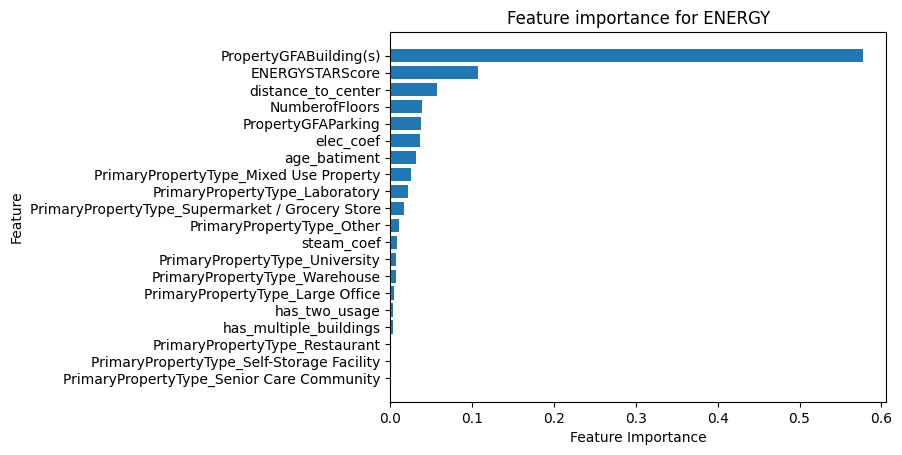

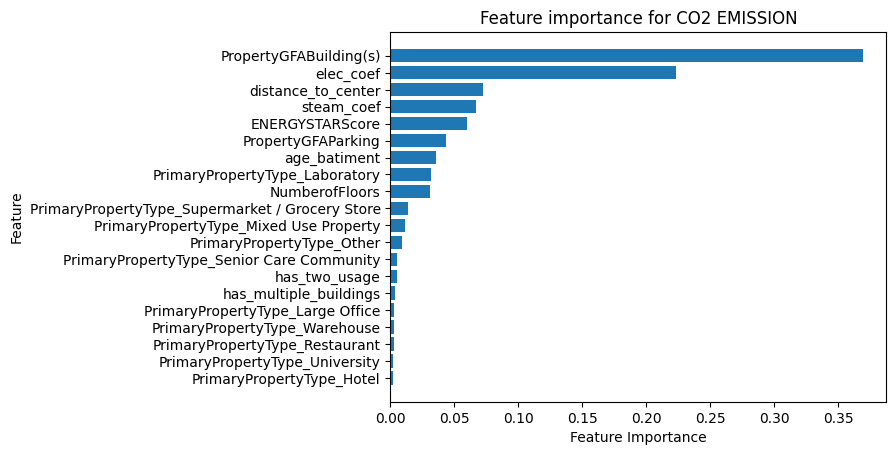

In [101]:
plot_feature_importance(X, y1, 'Feature importance for ENERGY')
plot_feature_importance(X, y2, 'Feature importance for CO2 EMISSION')

In [102]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [10, 15, 20], 
    'min_samples_split': [5, 10, 15],  
    'min_samples_leaf': [2, 5, 10] 
}

In [103]:
print(test_randomforest(X, y1,param_grid, cv))

print('---')

print(test_randomforest(X, y2,param_grid, cv))

{'best_params': {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}, 'avg_r2_train': 0.891841382787329, 'avg_r2_test': 0.4926279812205169, 'avg_mse': 29289399920486.668, 'avg_mae': 2577300.1911244085, 'avg_mape': 1.0705380920682075}
---
{'best_params': {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}, 'avg_r2_train': 0.8442432517610415, 'avg_r2_test': 0.5509988228628556, 'avg_mse': 13966.341760036012, 'avg_mae': 56.14430298516659, 'avg_mape': 1.1550793941256345}


### GradientBoosting

In [104]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

gbm.fit(X_train, y_train)

y_pred_train = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_r2 = gbm.score(X_train, y_train) 
test_r2 = gbm.score(X_test, y_test)    

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")
print("-----")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train R²: 0.8776
Test R²: 0.6334
-----
Train MSE: 8360576437295.4238
Test MSE: 28566607114273.4336


In [105]:
def test_gb(X, y, cv) -> dict:
    gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    mse_scorer = make_scorer(mean_squared_error)
    mae_scorer = make_scorer(mean_absolute_error)
    mape_scorer = make_scorer(mean_absolute_percentage_error)

    cv_results = cross_validate(
        gbm, X, y,
        cv=cv,
        scoring={
            'R2': 'r2',
            'MSE': mse_scorer,
            'MAE': mae_scorer,
            'MAPE': mape_scorer
        },
        return_train_score=True
    )
    
    result = {
        'avg_r2_train': np.mean(cv_results['train_R2']),
        'avg_r2_test': np.mean(cv_results['test_R2']),
        'avg_mse': np.mean(cv_results['test_MSE']),
        'avg_mae': np.mean(cv_results['test_MAE']),
        'avg_mape': np.mean(cv_results['test_MAPE']),
    }
    
    return result

In [106]:
print(test_gb(X, y1, cv))
print('------')
print(test_gb(X, y2, cv))

{'avg_r2_train': 0.8731558984081443, 'avg_r2_test': 0.5450607742218894, 'avg_mse': 25898773857271.598, 'avg_mae': 2439897.7836276446, 'avg_mape': 0.9850651497617257}
------
{'avg_r2_train': 0.8781233250991318, 'avg_r2_test': 0.5891476081942792, 'avg_mse': 13368.558050493248, 'avg_mae': 57.185088366922514, 'avg_mape': 1.49563736687543}


In [107]:
gbm = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : [3, 6, 9],
    "learning_rate" : [0.001, 0.01, 0.1]
}

GS = GridSearchCV(estimator=gbm,
                  param_grid=param_grid,
                  scoring=["r2", "neg_mean_absolute_percentage_error"],
                  refit = "r2",
                  cv=cv
)

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2)
    

In [108]:
GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             refit='r2', scoring=['r2', 'neg_mean_absolute_percentage_error'])

In [109]:
GS.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [110]:
gbm = GradientBoostingRegressor(**GS.best_params_, random_state=42)

mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
mape_scorer = make_scorer(mean_absolute_percentage_error)

cv_results = cross_validate(
    gbm, X, y1,
    cv=cv,
    scoring={
        'R2': 'r2',
        'MSE': mse_scorer,
        'MAE': mae_scorer,
        'MAPE': mape_scorer
    },
    return_train_score=True
)

In [111]:
cv_results['test_R2'].mean()

0.5450607742218894

In [112]:
cv_results

{'fit_time': array([0.21417689, 0.20666814, 0.20513153, 0.20351553, 0.2035718 ]),
 'score_time': array([0.00605202, 0.        , 0.        , 0.00303459, 0.        ]),
 'test_R2': array([0.57055163, 0.5205585 , 0.36294604, 0.69934484, 0.57190286]),
 'train_R2': array([0.87257934, 0.88037148, 0.86440323, 0.85924495, 0.88918048]),
 'test_MSE': array([6.23015289e+13, 3.34347832e+13, 7.40009263e+12, 3.28887184e+12,
        2.30685928e+13]),
 'train_MSE': array([5.17734793e+12, 8.31231335e+12, 1.11218790e+13, 1.14630242e+13,
        8.19269051e+12]),
 'test_MAE': array([4398183.61392423, 2992902.51294434, 1426723.12075162,
        1051481.83897925, 2330197.83153878]),
 'train_MAE': array([1271701.90675804, 1482308.21654342, 1819524.03887785,
        1833773.44194078, 1577770.18259905]),
 'test_MAPE': array([0.52243401, 0.69184343, 1.80946482, 0.9931675 , 0.90841599]),
 'train_MAPE': array([0.8747701 , 0.89886303, 0.72971099, 0.77240969, 0.80494309])}

In [113]:
param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : [3, 6, 9],
    "learning_rate" : [0.001, 0.01, 0.1]
}

In [114]:
def gridcv_gbm(X, y, param_grid, cv, random_state=42, return_result=True):
    
    gbm = GradientBoostingRegressor(random_state=random_state)



    GS = GridSearchCV(estimator=gbm,
                    param_grid=param_grid,
                    scoring=["r2", "neg_mean_absolute_percentage_error"],
                    refit = "r2",
                    cv=cv
    )

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    GS.fit(X, y)
    
    gbm = GradientBoostingRegressor(**GS.best_params_, random_state=42)

    mse_scorer = make_scorer(mean_squared_error)
    mae_scorer = make_scorer(mean_absolute_error)
    mape_scorer = make_scorer(mean_absolute_percentage_error)

    cv_results = cross_validate(
        gbm, X, y,
        cv=cv,
        scoring={
            'R2': 'r2',
            'MSE': mse_scorer,
            'MAE': mae_scorer,
            'MAPE': mape_scorer
        },
        return_train_score=True
    )
    
    result = {
            'avg_r2_train': np.mean(cv_results['train_R2']),
            'avg_r2_test': np.mean(cv_results['test_R2']),
            'avg_mse': np.mean(cv_results['test_MSE']),
            'avg_mae': np.mean(cv_results['test_MAE']),
            'avg_mape': np.mean(cv_results['test_MAPE']),
        }

    if return_result:

            
        return result

    else:
        return GS

In [115]:
print(gridcv_gbm(X, y1, param_grid, cv))
print('------')
print(gridcv_gbm(X, y2, param_grid, cv))

{'avg_r2_train': 0.8731558984081443, 'avg_r2_test': 0.5450607742218894, 'avg_mse': 25898773857271.598, 'avg_mae': 2439897.7836276446, 'avg_mape': 0.9850651497617257}
------
{'avg_r2_train': 0.9271063093918326, 'avg_r2_test': 0.5898521554310163, 'avg_mse': 13088.340708221787, 'avg_mae': 56.395029060596336, 'avg_mape': 1.5188639700674058}


In [116]:
results_y1 = {'avg_r2_train': 0.8962952619974685, 'avg_r2_test': 0.6907401325938788, 'avg_mse': 0.3378226571738671, 'avg_mae': 0.4191125221959743, 'avg_mape': 0.028678322145613788}

results_y2 = {'avg_r2_train': 0.9224156250847632, 'avg_r2_test': 0.794162978048438, 'avg_mse': 0.31158982957793363, 'avg_mae': 0.4109975783278541, 'avg_mape': 0.1434535900589516}

In [117]:
model_co2 = gridcv_gbm(X, y1, param_grid, cv, return_result=False)

model_energie = gridcv_gbm(X, y2, param_grid, cv, return_result=False)

In [129]:
import bentoml

ImportError: cannot import name 'NOTHING' from 'attr' (c:\Applications\01_data_engineer\06_batiment_consommation\.venv\lib\site-packages\attr.py)